## Assignment 1: Machine Learning Methods

### \Akshita Sharma \a1902331

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

### 1. Read the dataset

In [68]:
#importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [69]:
data = pd.read_csv("ObesityDataSet.csv") # Reading the Data
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 2. Analyse and visualise the data 

Analysing and visualisation of the data is done to understand the characteristics of the data. Visualization also helps in identifying patterns, trends, and outliers. This initial analysis can help guide the choice of suitable ML algorithms. This process can also help in selecting, modifying, or creating new features to improve the model's performance.

In [70]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Below step is to check if there are any null values in the data set

In [71]:
data.isnull().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

data.isnull().any() check for null or blank values in the data. It seems that there are no missing values in our data.

The data.dtypes command in pandas returns the data types of each column in the DataFrame data.

In [72]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In the below step the histograms help to visualise the frequency of the values

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

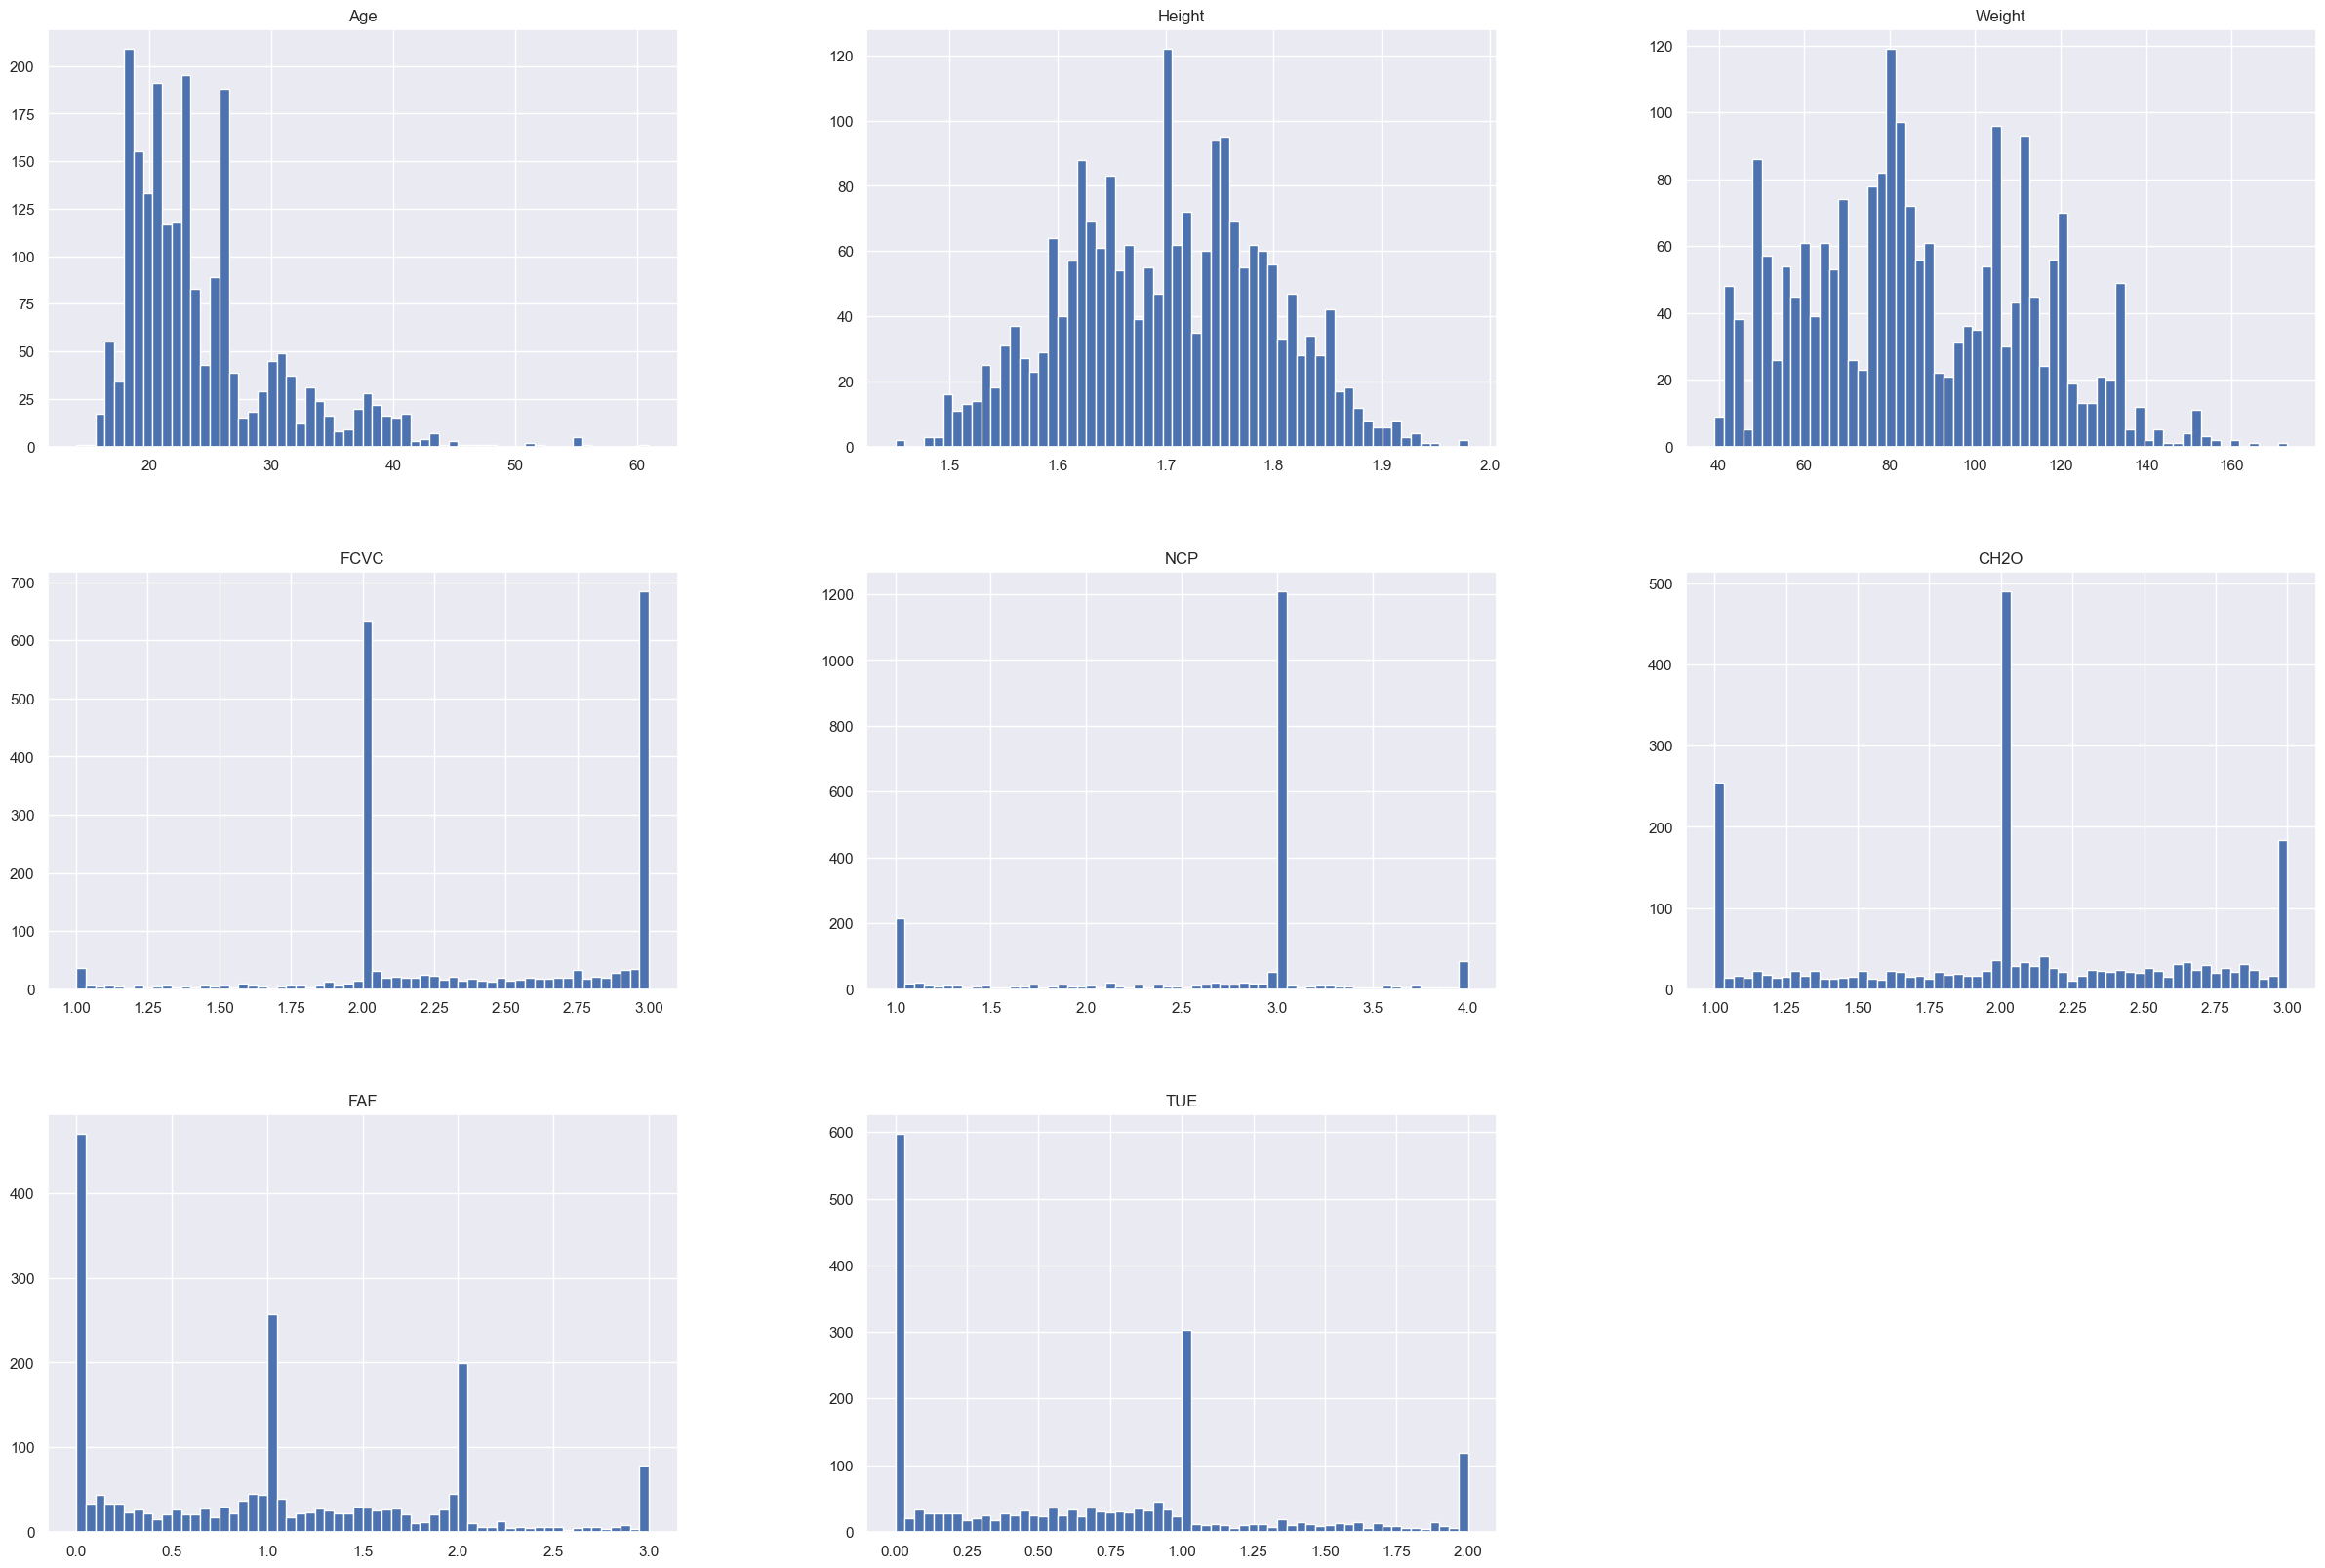

In [73]:
data.hist(bins=60, figsize = (30,20))

Removing the outlier from Age column, since the histogram above showed that the majority of the values for age lie till 40 years

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering the data without outliers
df = data[(data['Age'] >= Q1 - 1.5 * IQR) & (data['Age'] <= Q3 + 1.5 * IQR)]

Replacing the categorical values to numerical

In [74]:
# replacing categorical values with numerical values
data['family_history_with_overweight'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
data['FAVC'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
data['CAEC'].replace(['Always', 'Frequently','Sometimes','no'],
                        [3, 2, 1, 0], inplace=True)
data['SMOKE'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
data['SCC'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
data['CALC'].replace(['Always', 'Frequently','Sometimes','no'],
                        [3, 2, 1, 0], inplace=True)
data['MTRANS'].replace(['Automobile', 'Public_Transportation','Motorbike','Bike','Walking'],
                        [4, 3, 2, 1, 0], inplace=True)
data['Gender'].replace(['Female', 'Male'],
                        [1, 0], inplace=True)

#### *Visualisations for all the columns*
Reason for using violinplot is that it helps compares the distribution of variables across the columns and it also helps in comparing the distributions.
Reason for using histplot is that it shows the frequency of the variables for each column.

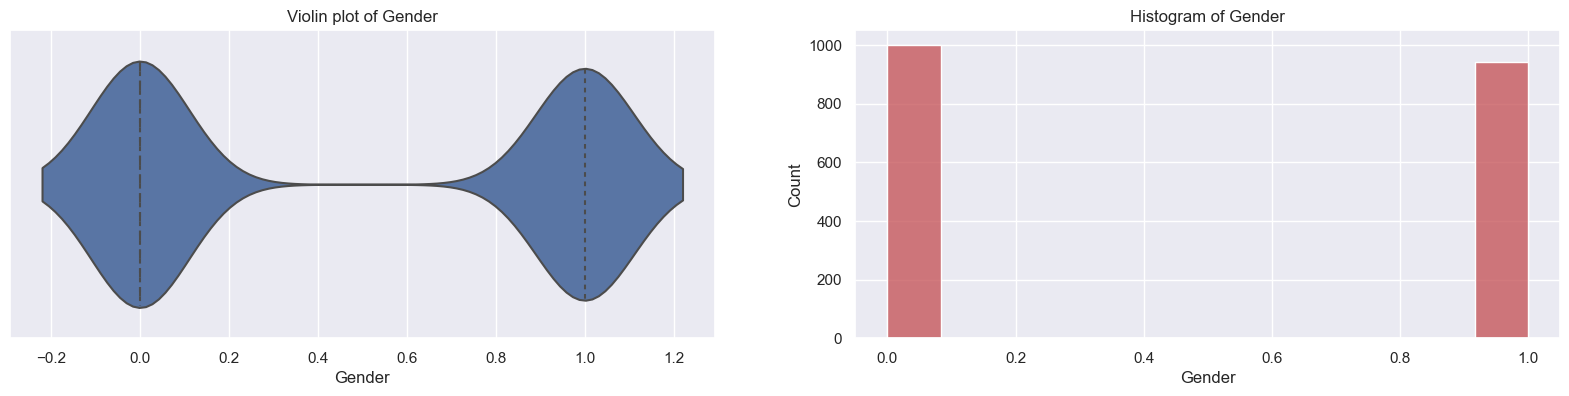

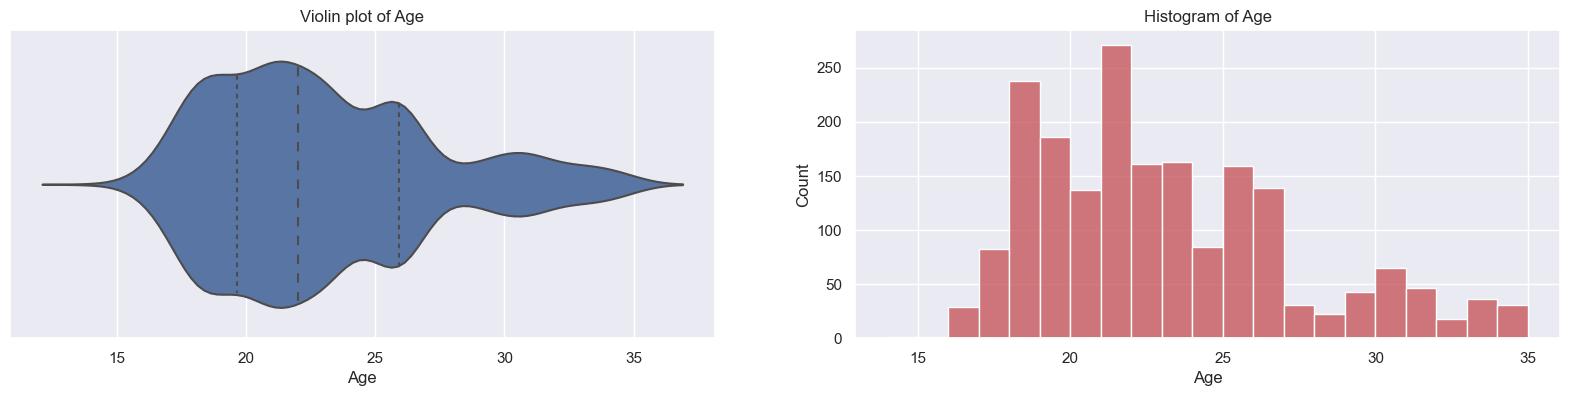

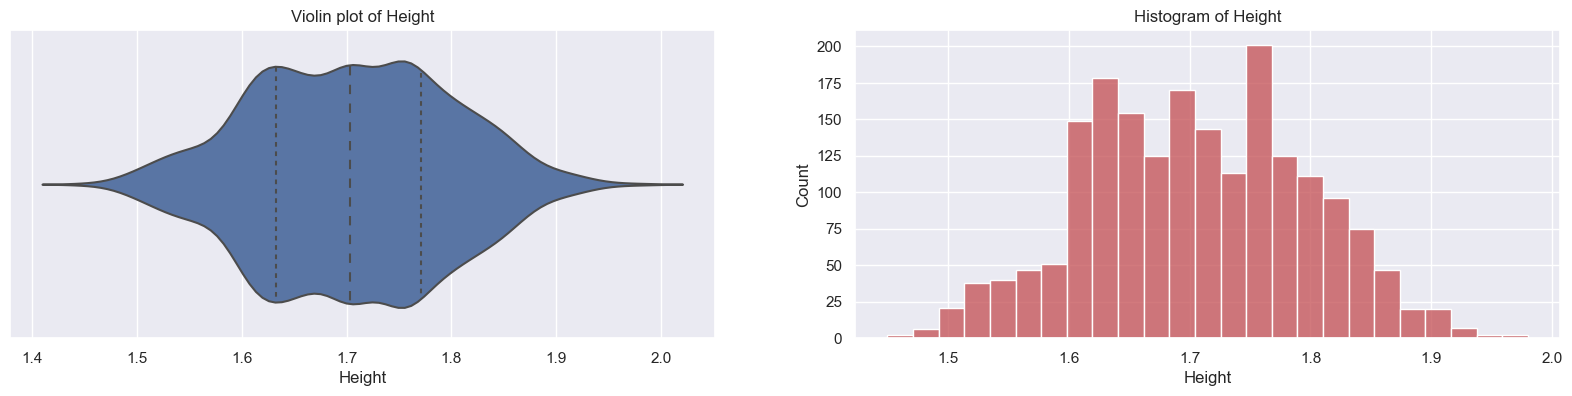

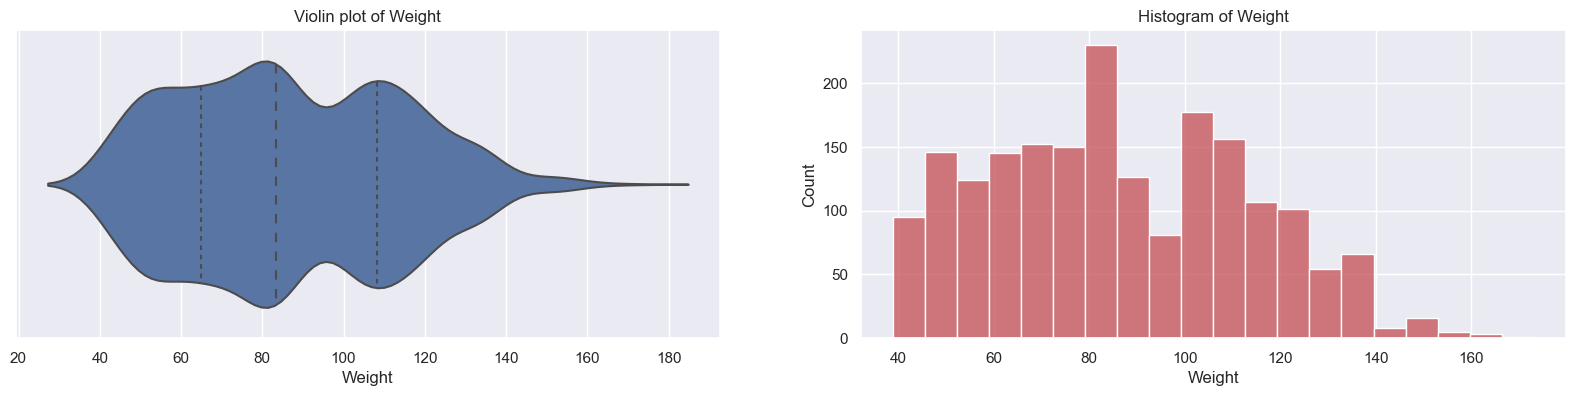

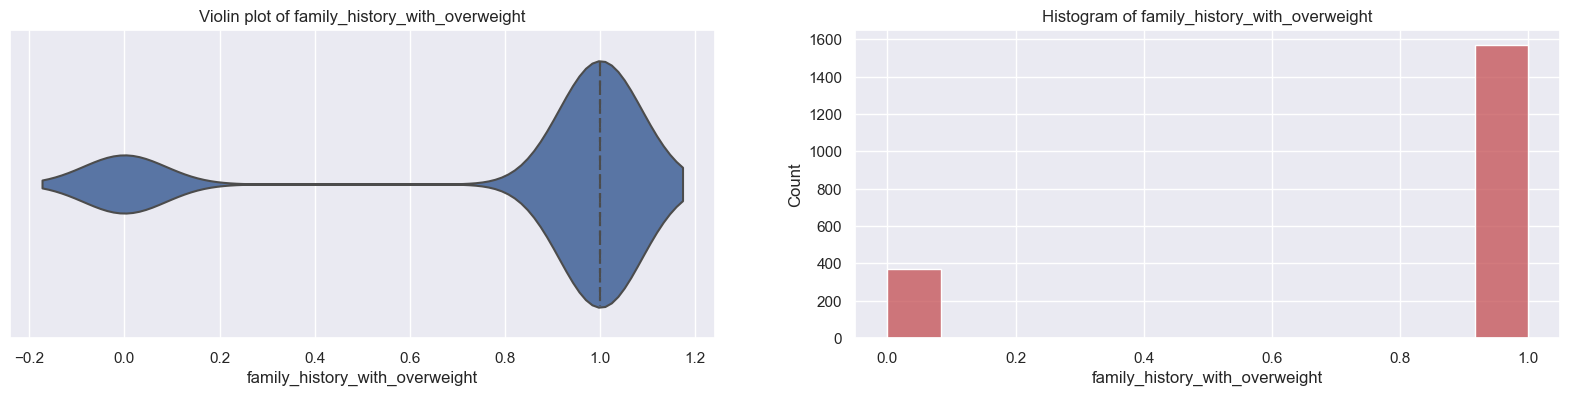

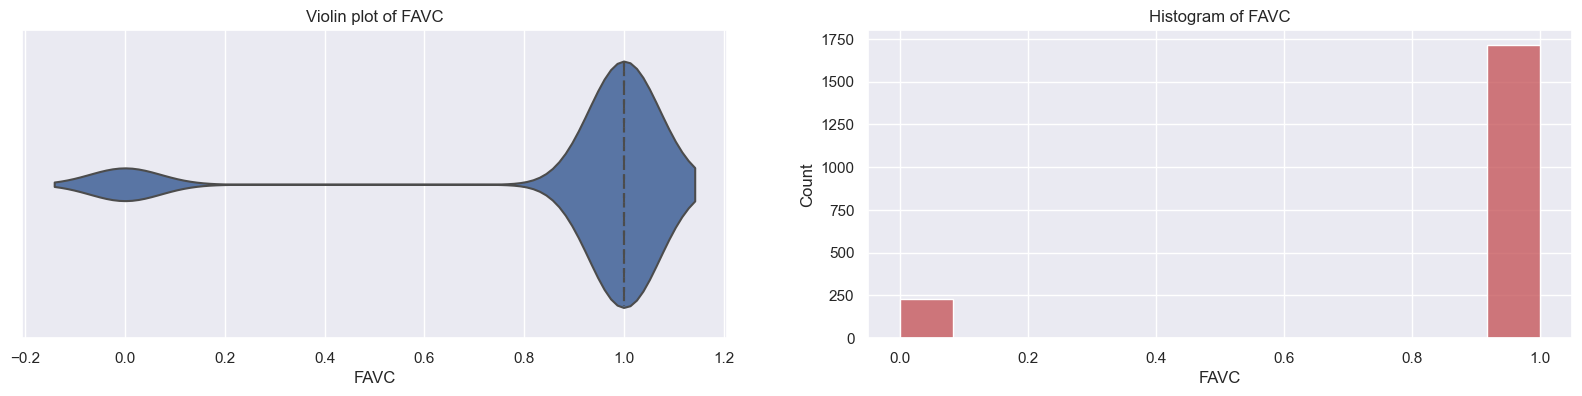

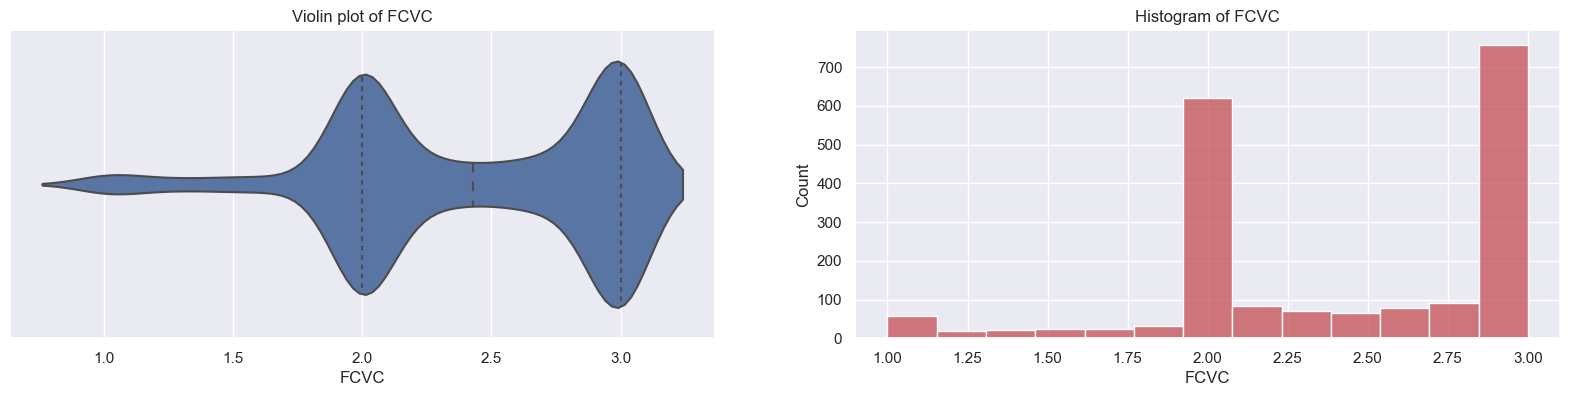

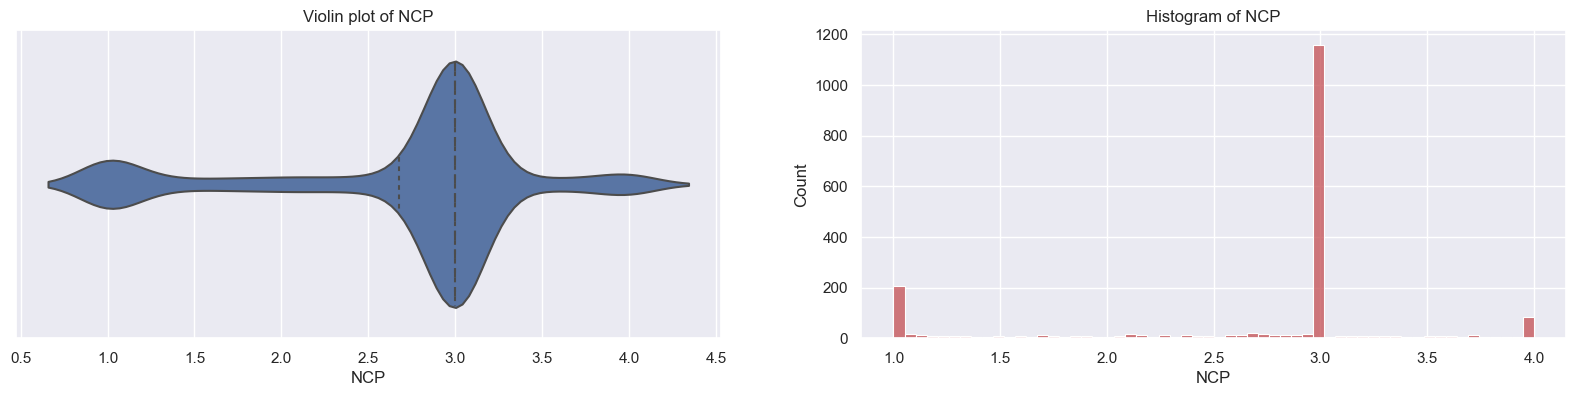

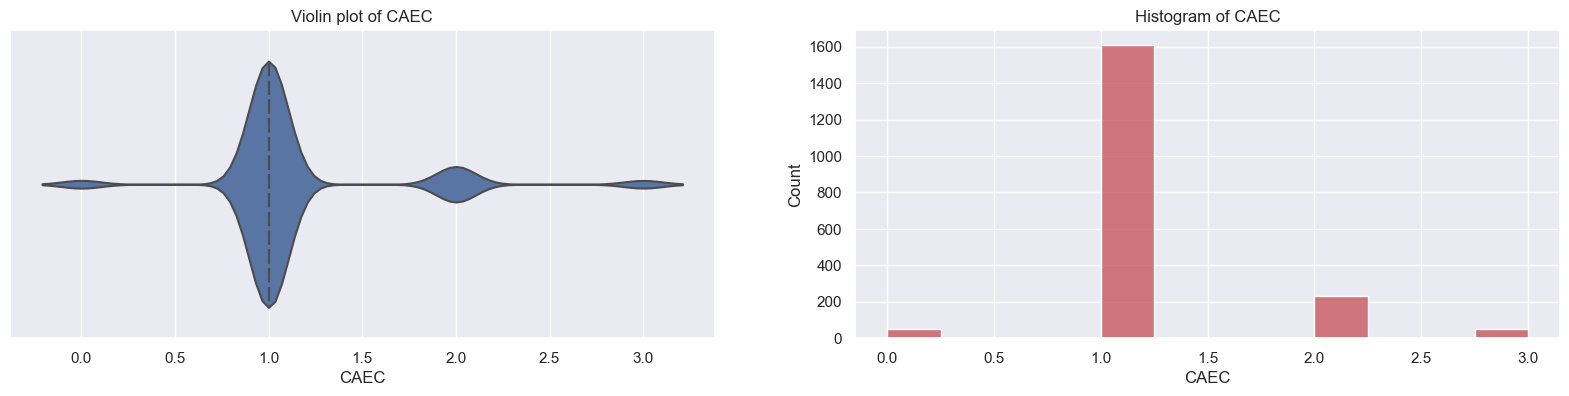

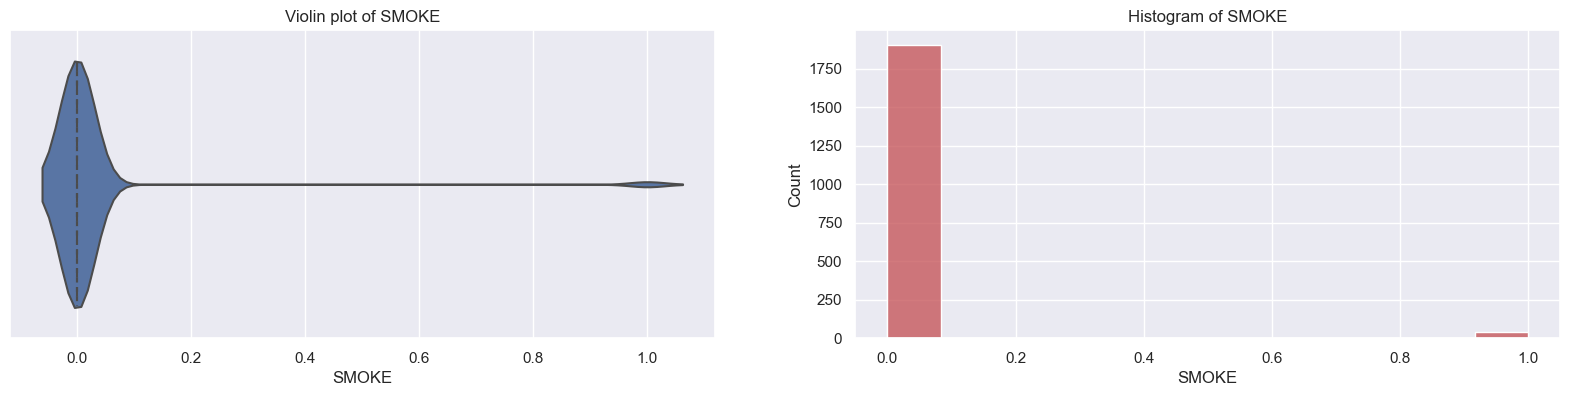

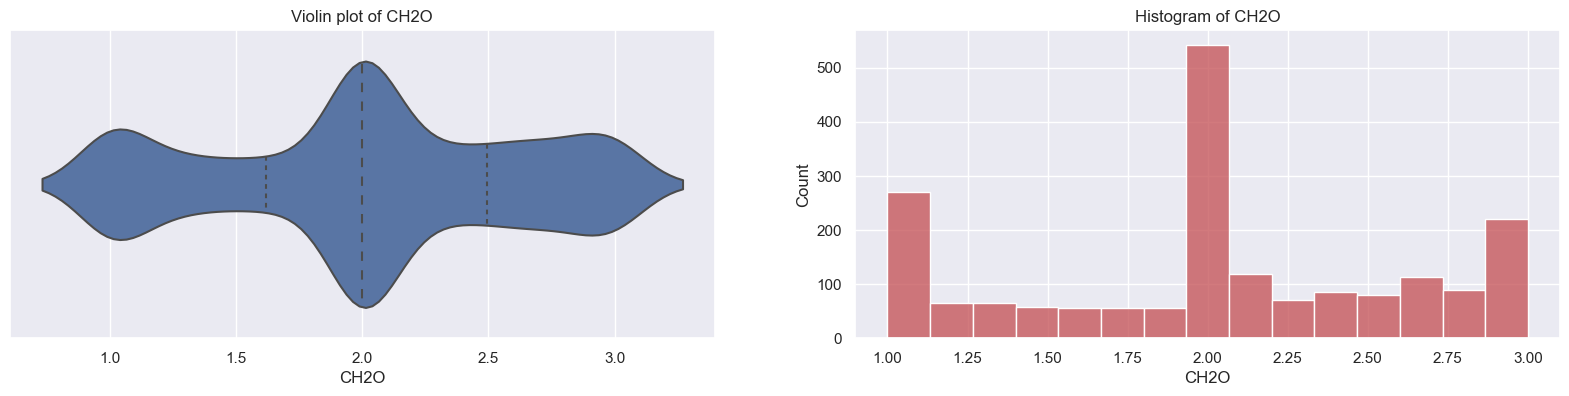

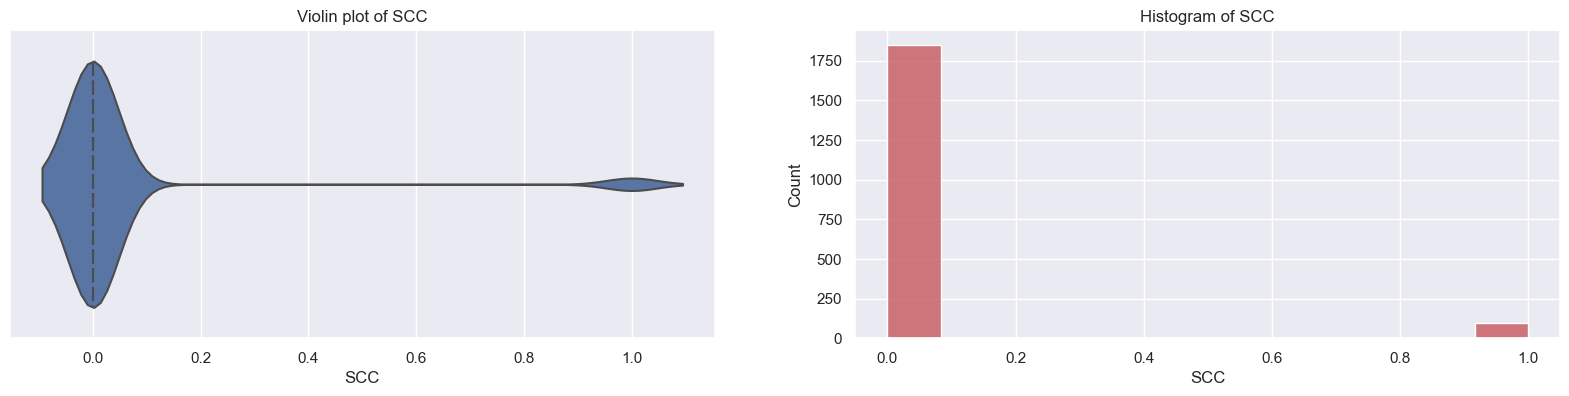

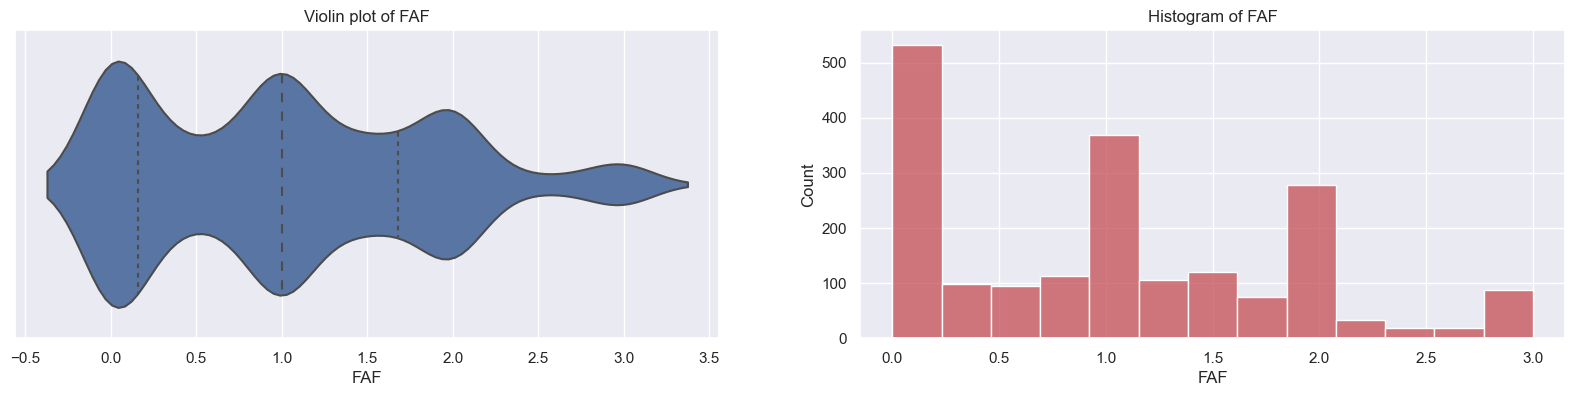

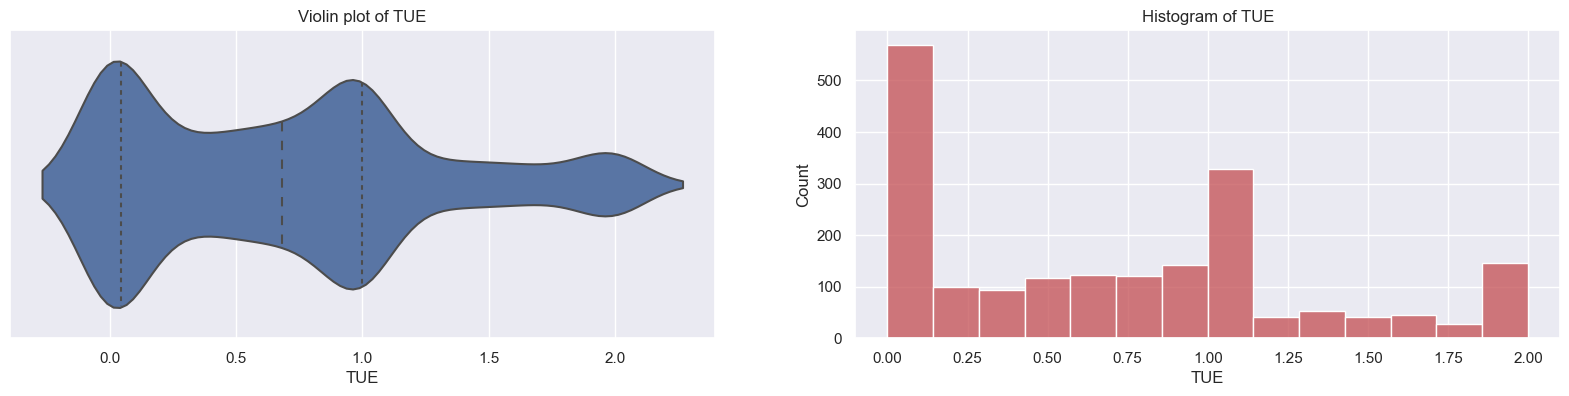

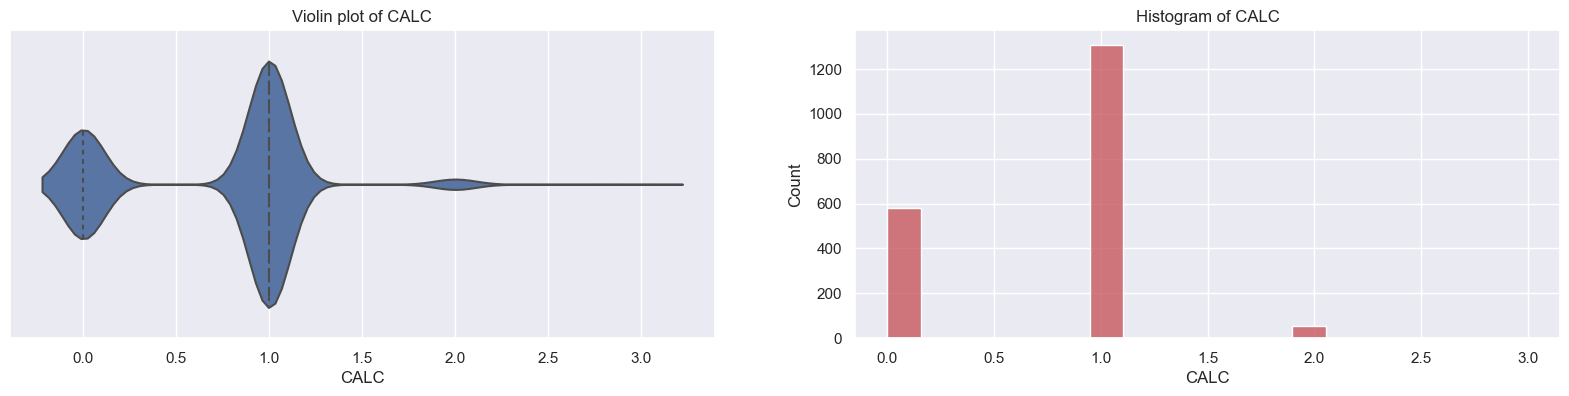

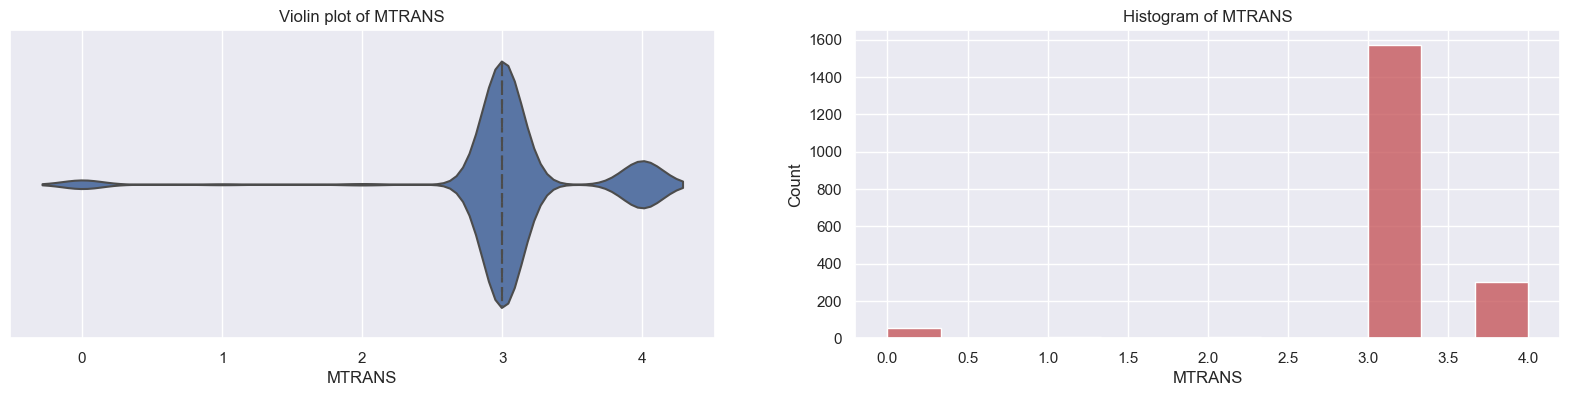

In [76]:
for i in range(len(df.columns)):
    current_column = df.columns[i]
    
    # Skipping the 'NObeyesdad' column
    if current_column == 'NObeyesdad':
        continue

    # Set 'a' to be the 'NObeyesdad' column
    a = df['NObeyesdad']
    # Set 'b' to be the current column's data
    b = df[current_column]

    # Creatinh subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

    sns.violinplot(x=df[current_column], ax=ax1, data=df, inner='quartile', split=True)
    sns.histplot(df[current_column], ax=ax2, color='r')

    # Setting titles
    ax1.set_title(f'Violin plot of {current_column}')
    ax2.set_title(f'Histogram of {current_column}')

    plt.show()

Scatterplot is being used to help identify any trends, finding out any correlations, or assessing the distributions.
Boxplot is being used to measure central tendency and spread.

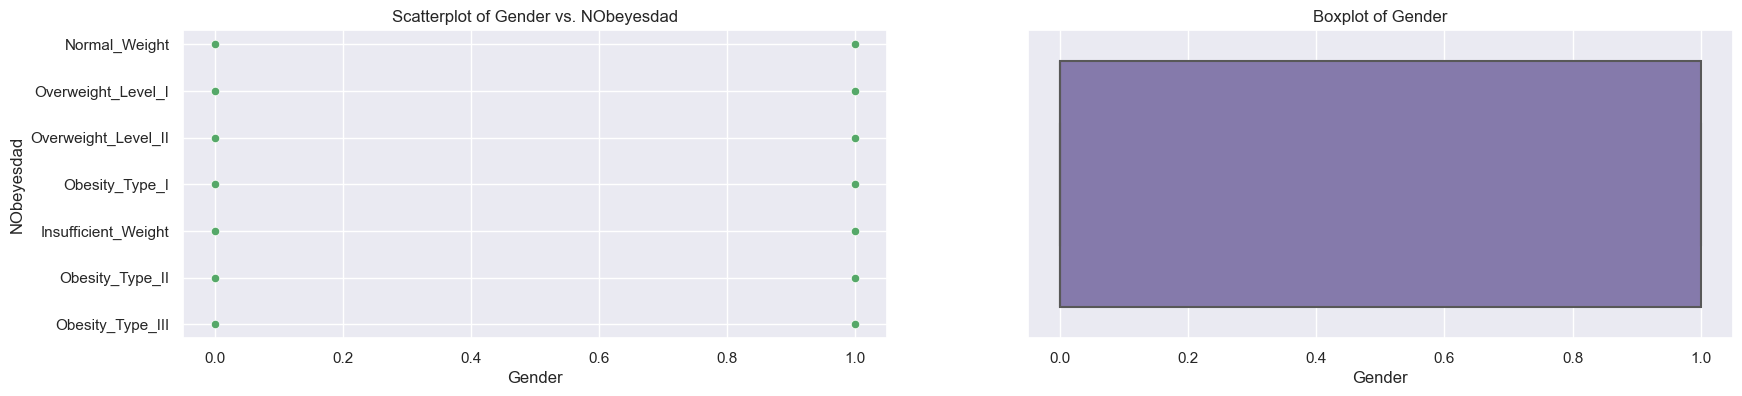

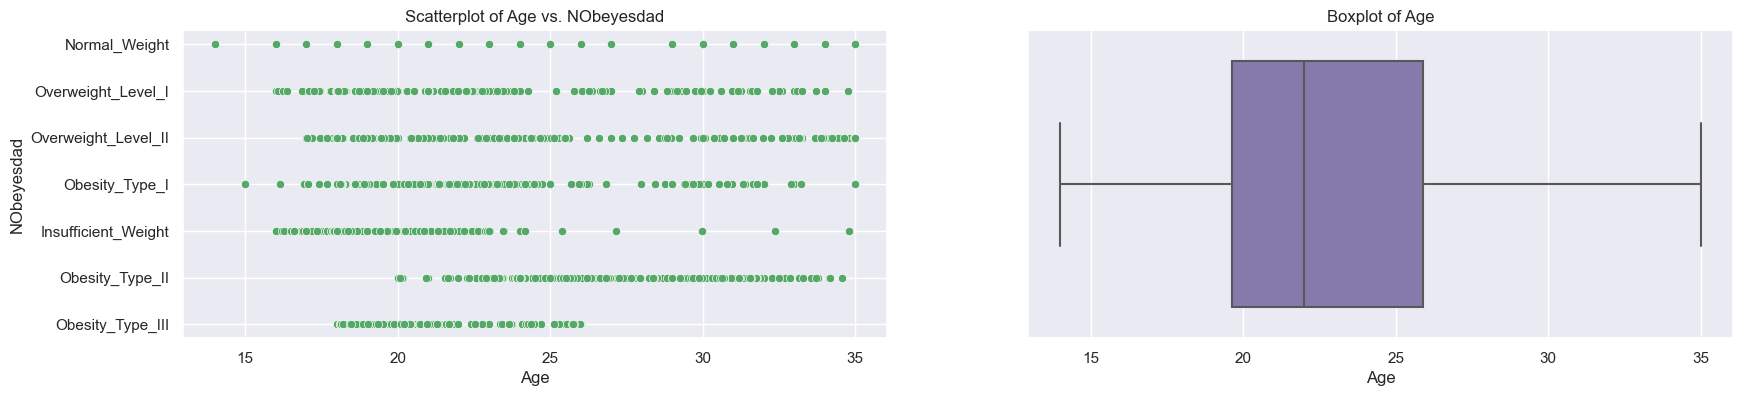

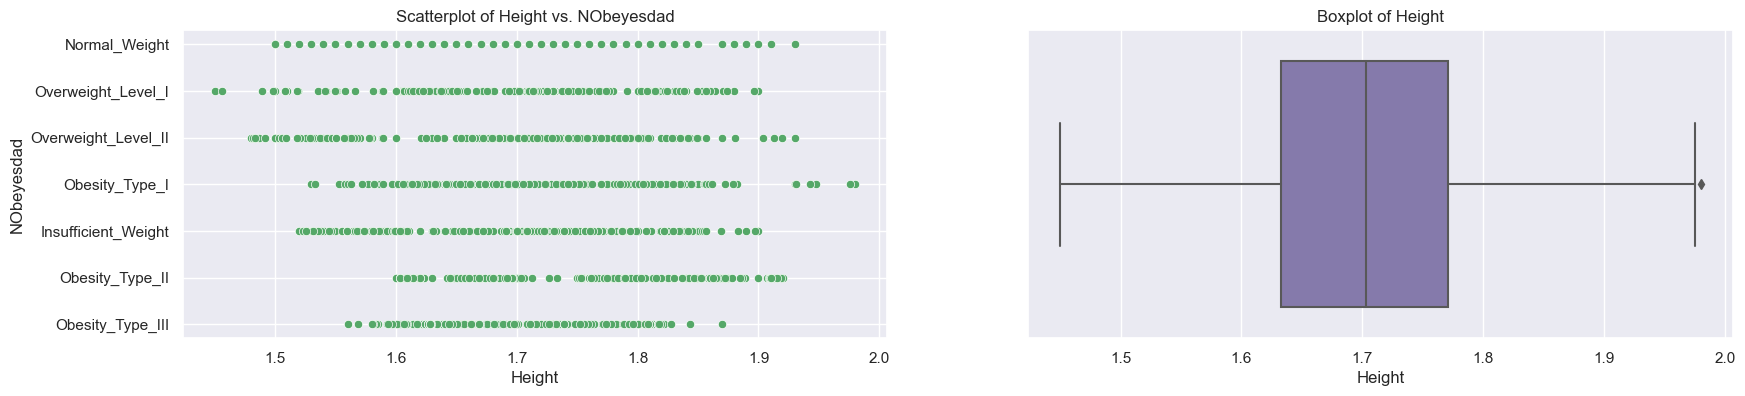

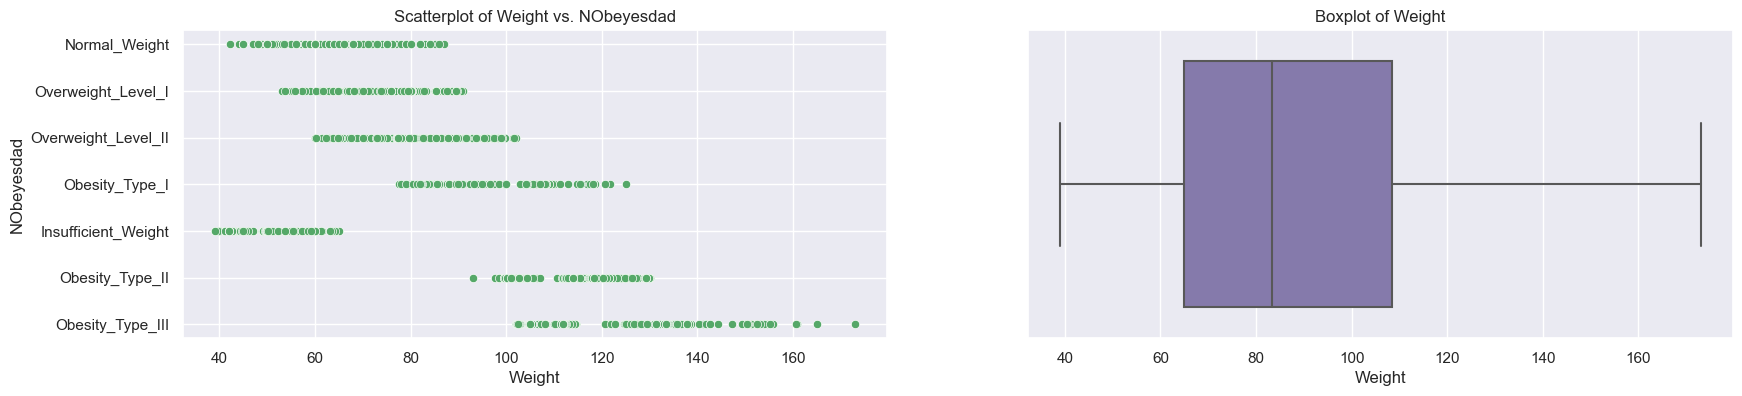

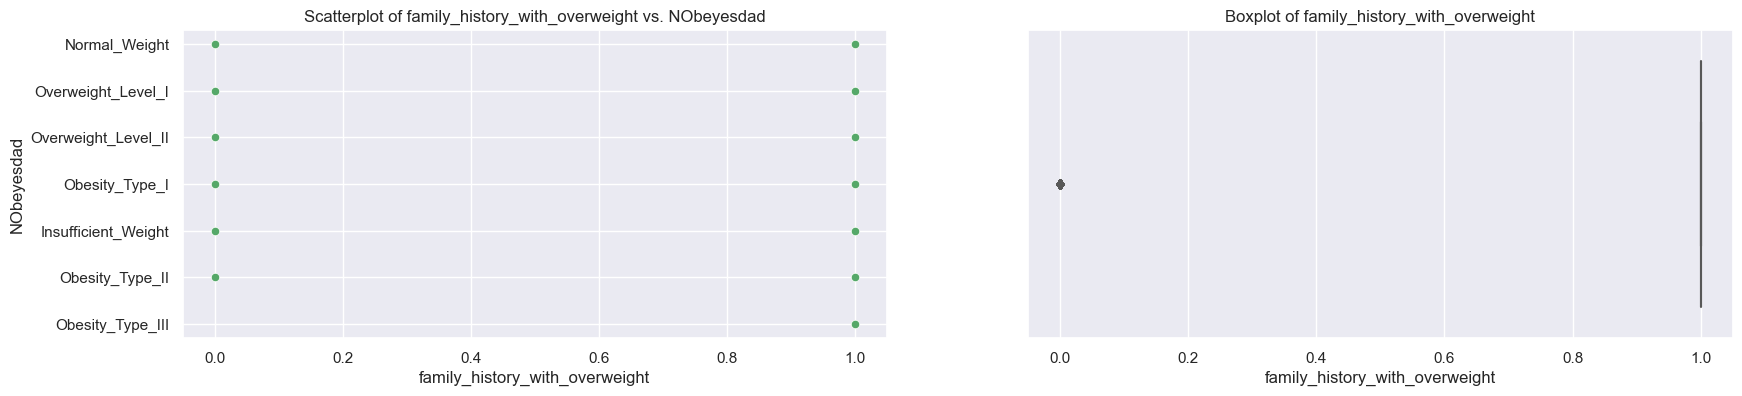

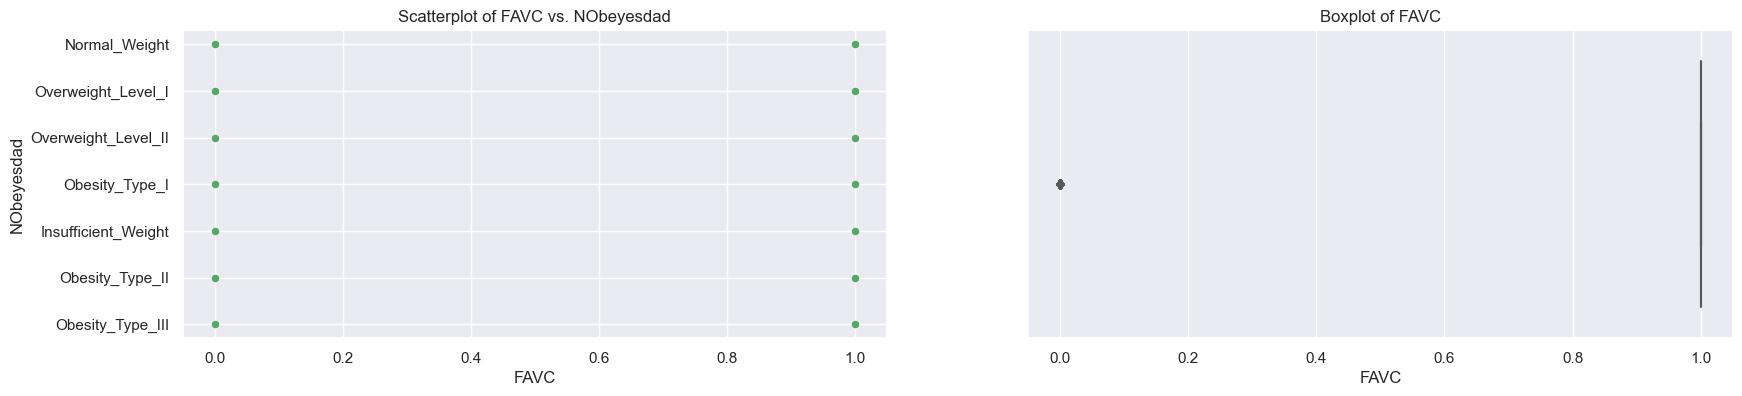

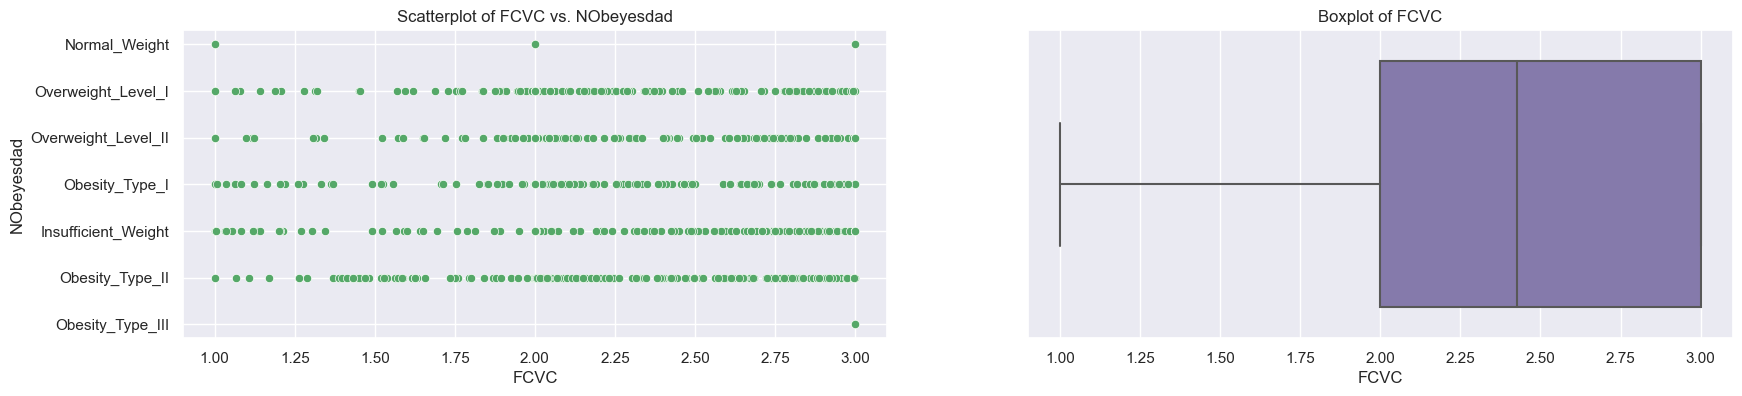

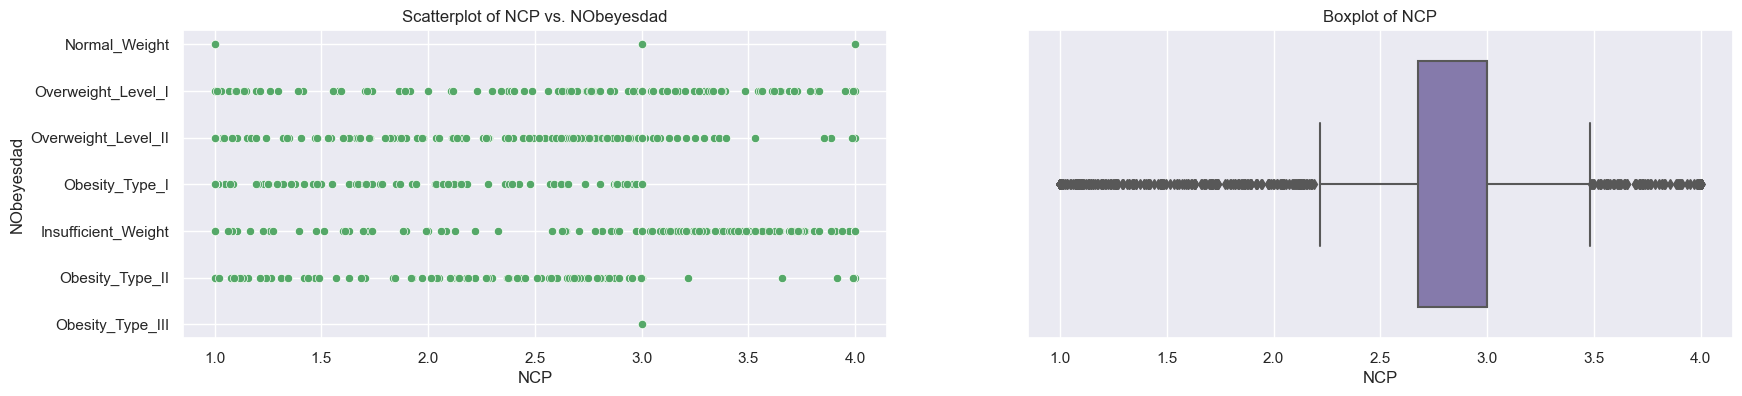

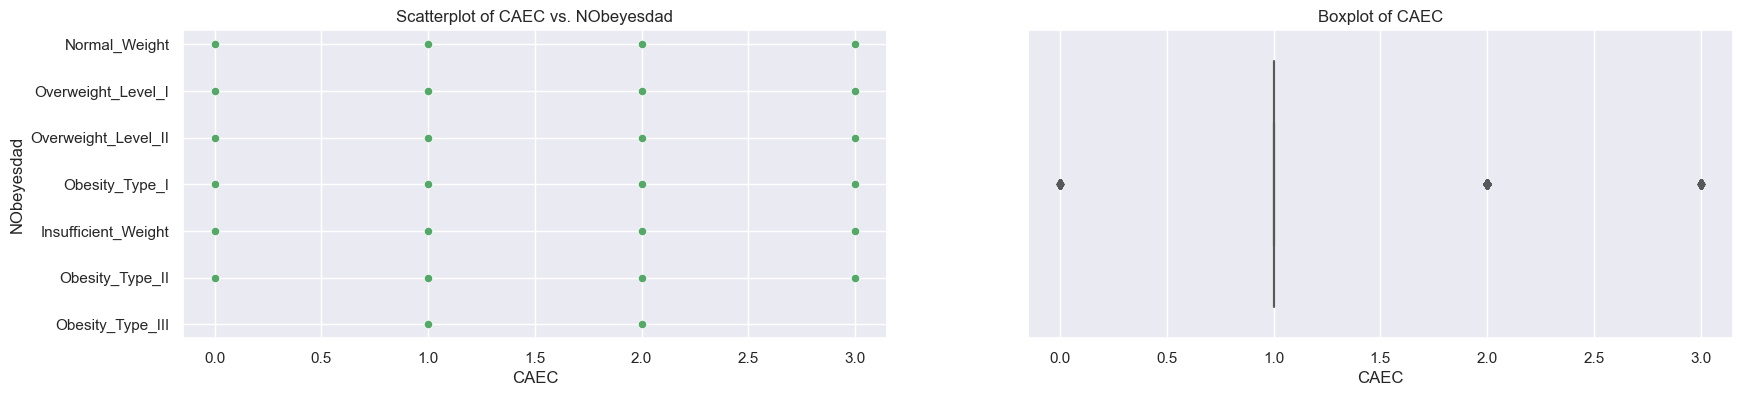

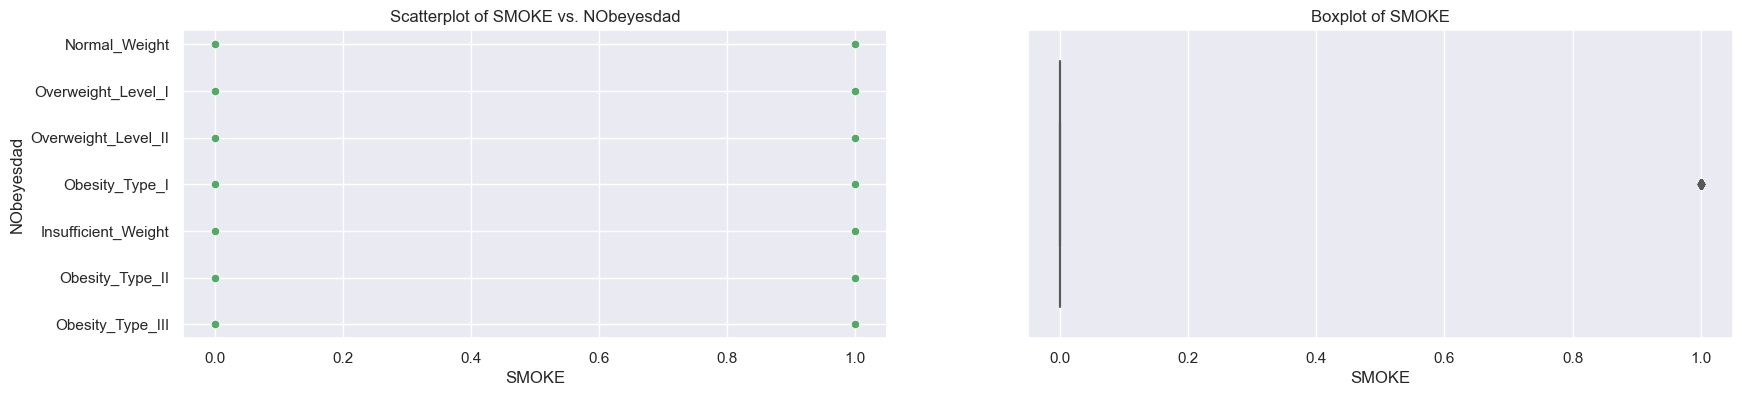

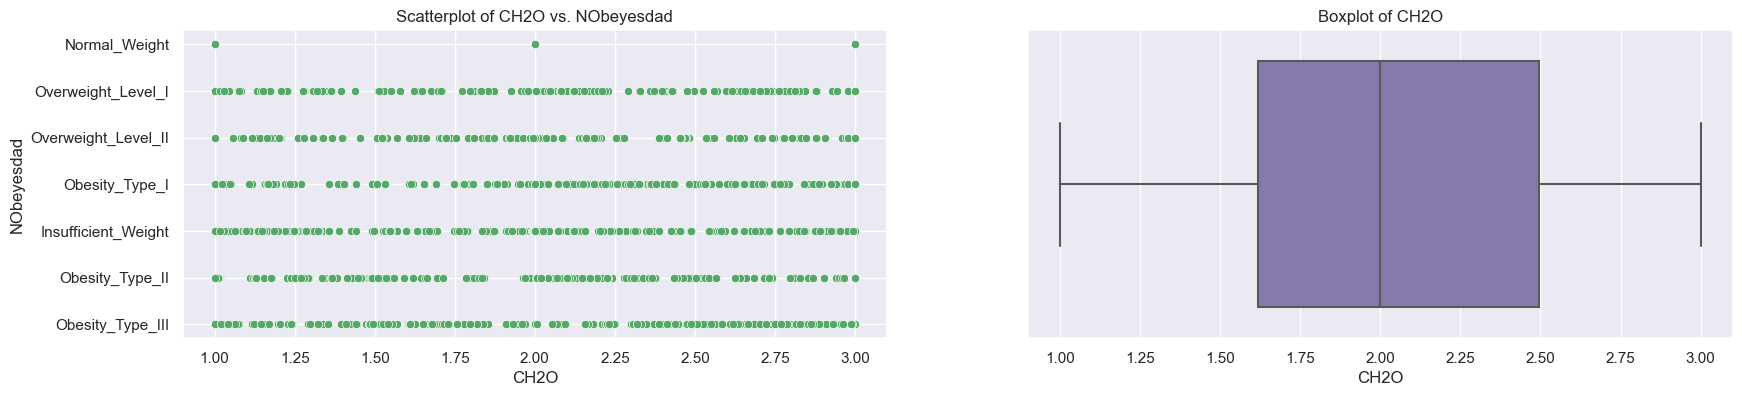

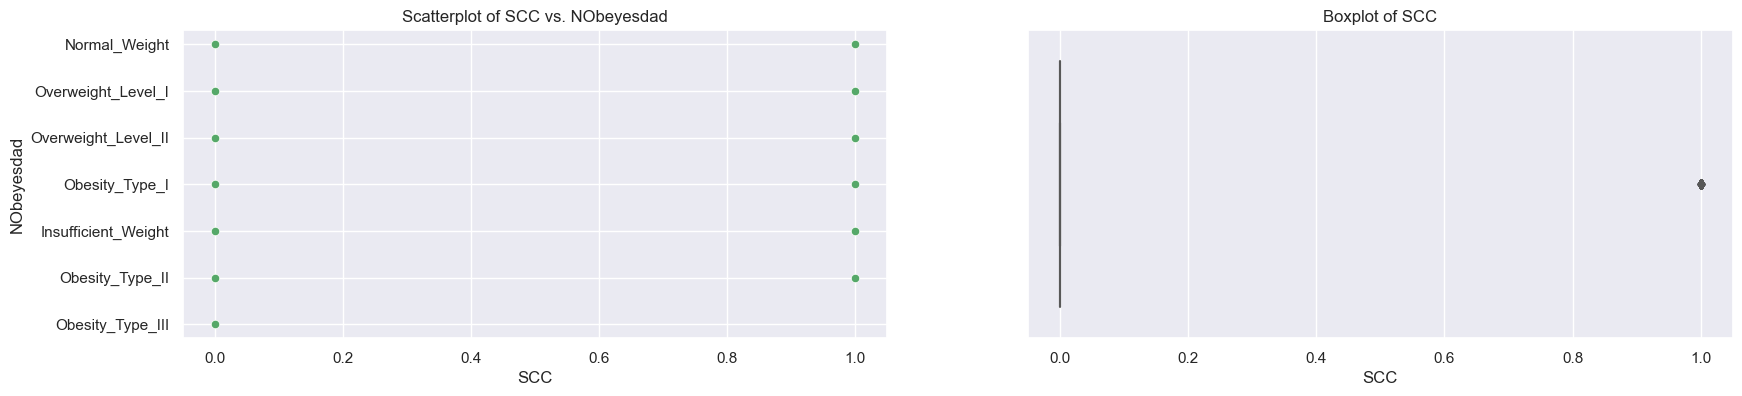

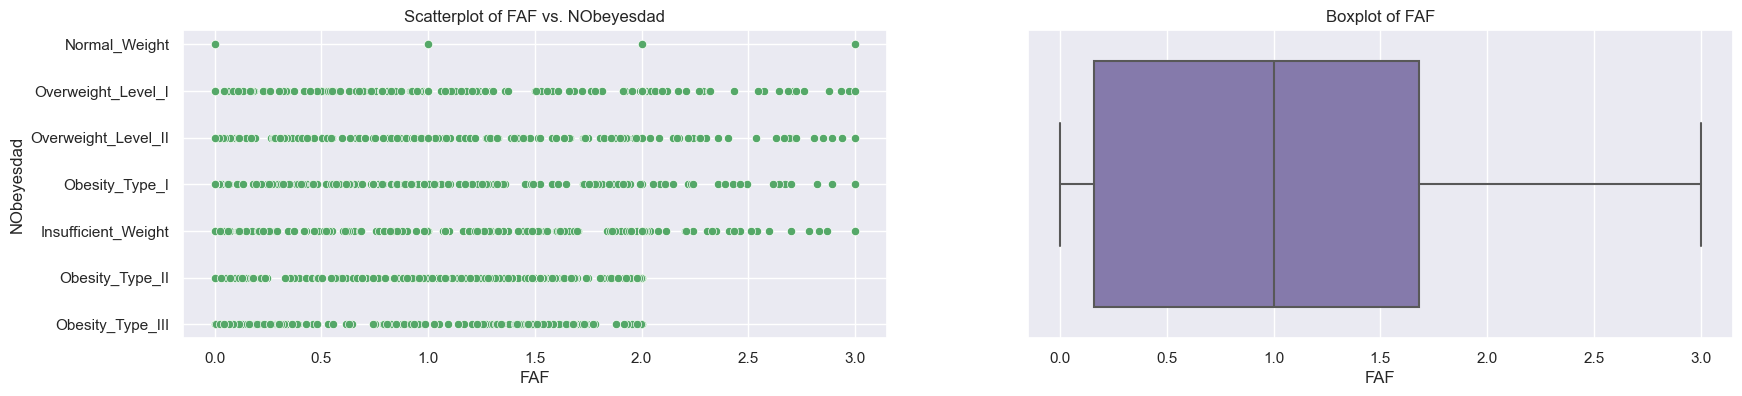

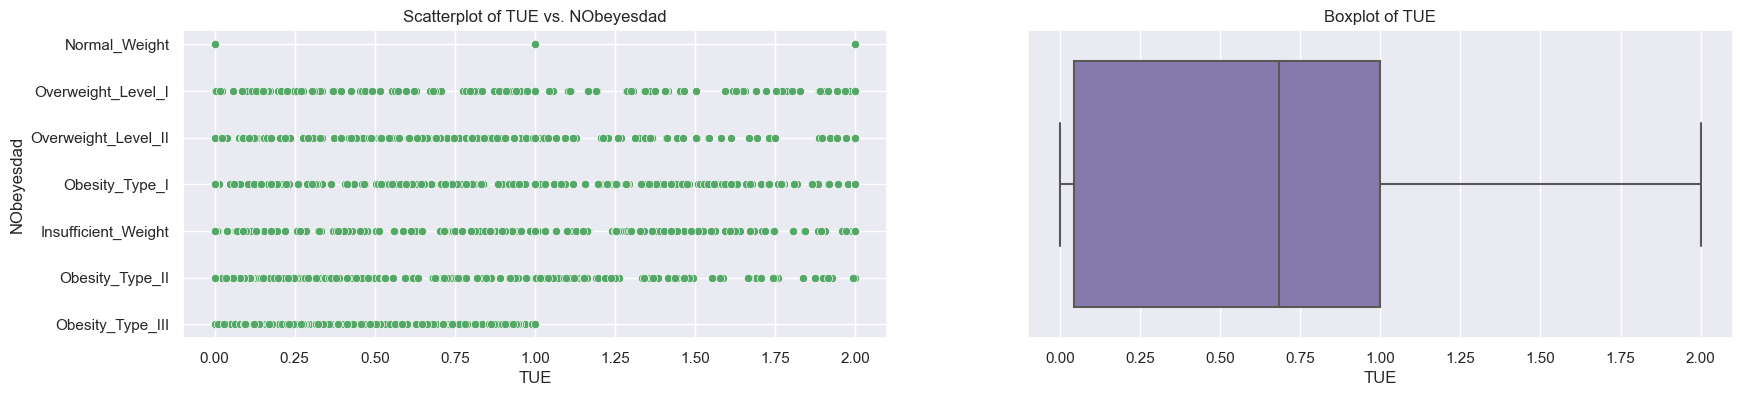

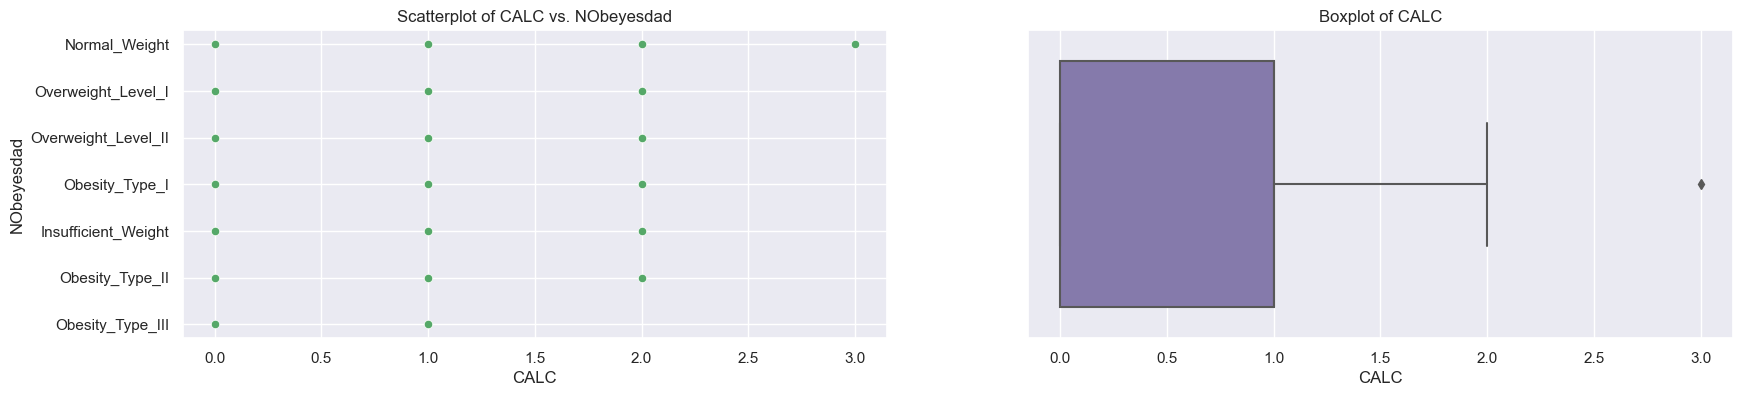

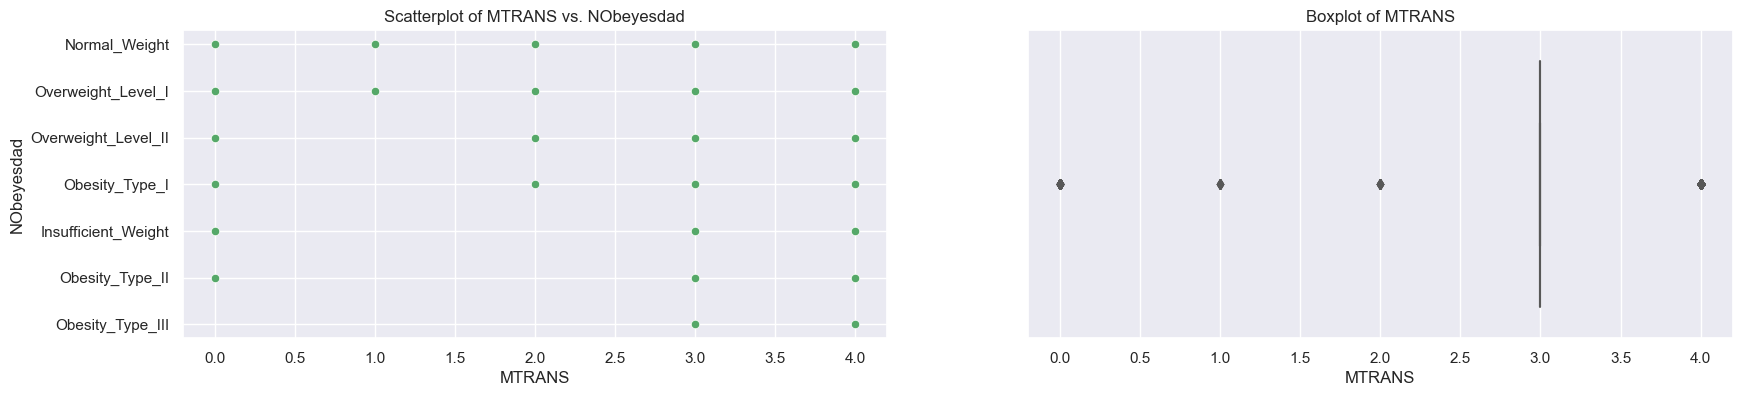

In [77]:
for i in range(len(df.columns)):
    current_column = df.columns[i]
    
    # Skip the 'NObeyesdad' column
    if current_column == 'NObeyesdad':
        continue

    a = df['NObeyesdad']
    b = df[current_column]

    # Creating subplots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

    sns.scatterplot(x=current_column, y='NObeyesdad', data=df, ax=ax1, color='g')
    sns.boxplot(x=current_column, data=df, ax=ax2, color='m')

    # Setting titles
    ax1.set_title(f'Scatterplot of {current_column} vs. NObeyesdad')
    ax2.set_title(f'Boxplot of {current_column}')

    plt.show()


Visualising BMI against some of the columns in the data to understand the relation between BMI and columns such as FAVC and SCC

<Axes: xlabel='FAVC', ylabel='BMI'>

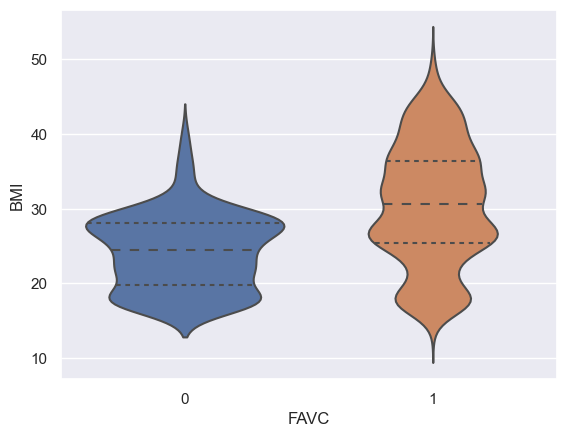

In [78]:
data.loc[:, 'BMI'] = data['Weight'] / (data['Height'] ** 2)

sns.violinplot(x=data['FAVC'], y=data['BMI'], data=data, inner='quartile', split=True)

<Axes: xlabel='SCC', ylabel='BMI'>

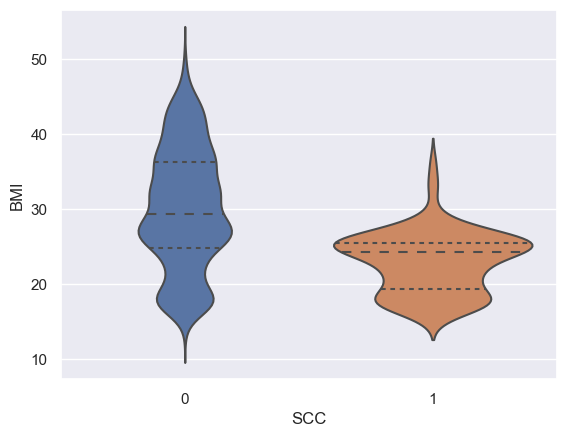

In [79]:
sns.violinplot(x=data['SCC'], y=data['BMI'], data=data, inner='quartile', split=True)

Creating BMI categories

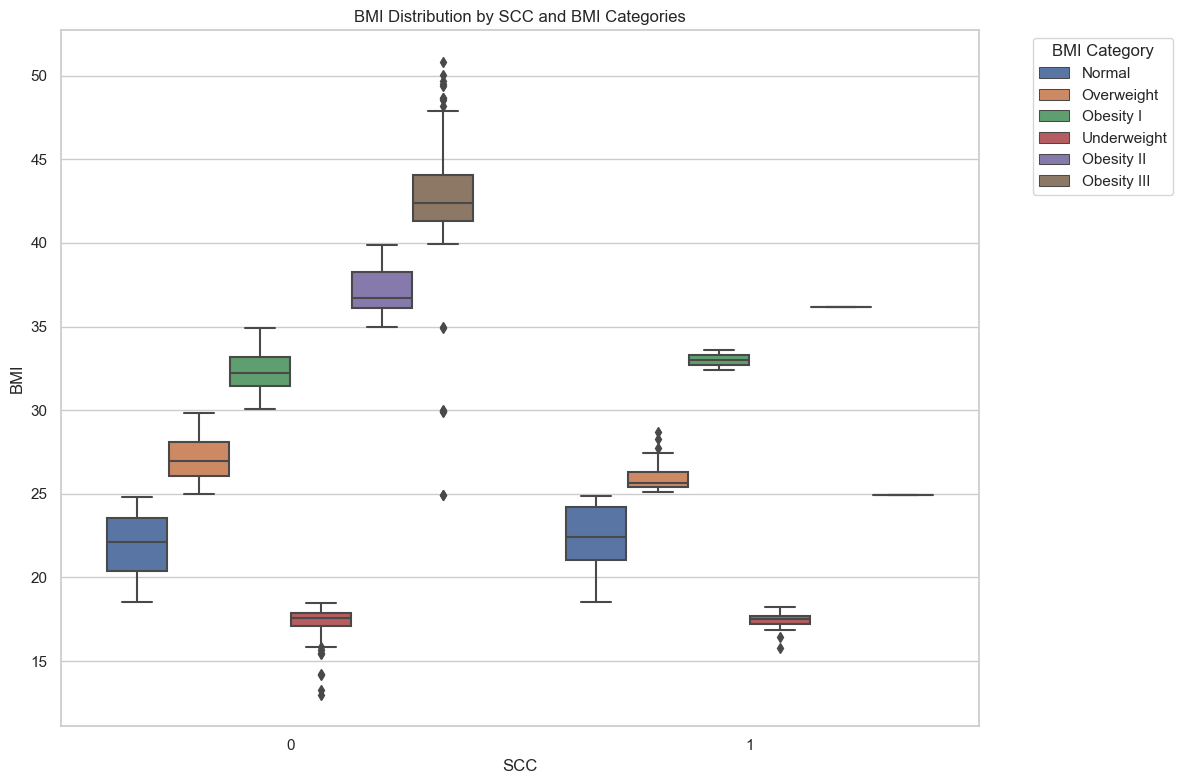

In [81]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 34.9:
        return 'Obesity I'
    elif 35 <= bmi <= 39.9:
        return 'Obesity II'
    else:  # BMI 40 or higher
        return 'Obesity III'

df = df.copy() 

df.loc[:, 'BMI'] = df['Weight'] / (df['Height'] ** 2)

df.loc[:,'BMI_Category'] = df['BMI'].apply(categorize_bmi)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

# Creating a box plot
sns.boxplot(x='SCC', y='BMI', hue='BMI_Category', data=df)

# Adding titles and labels
plt.title('BMI Distribution by SCC and BMI Categories')
plt.xlabel('SCC')
plt.ylabel('BMI')

# Adjusting the position of the legenda
plt.legend(title='BMI Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Coverting the BMI category to numerical values

In [82]:
df['BMI_Category'].replace(['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'],
                        [0, 1, 2, 3 , 4, 5], inplace=True)

In [83]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,BMI_Category
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,Normal_Weight,24.386526,1
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,Normal_Weight,24.238227,1
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,Normal_Weight,23.765432,1
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,Overweight_Level_I,26.851852,2
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,Overweight_Level_II,28.342381,2


### 3. Organise the data for modelling

In the below code segament, y is assigned the target variable 'BMI_Category' from the dataframe df. The features X and dd are prepared by dropping the columns 'BMI', 'BMI_Category', and 'NObeyesdad' from df, ensuring they are not included as predictors in the modeling process. This step is crucial for separating the features from the target and avoiding data leakage by excluding columns not intended for the model.

In [84]:
y = df['BMI_Category']
X = df.drop(['BMI', 'BMI_Category', 'NObeyesdad'], axis=1)

dd = df.drop(['BMI', 'BMI_Category', 'NObeyesdad'], axis=1)

# Checking the assignment
print(X.head())  # Should show the first few rows of the feature set
print(y.head())  # Should show the first few rows of the target variable

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62    64.0                               1     0   2.0   
1       1  21.0    1.52    56.0                               1     0   3.0   
2       0  23.0    1.80    77.0                               1     0   2.0   
3       0  27.0    1.80    87.0                               0     0   3.0   
4       0  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0  3.0     1      0   2.0    0  0.0  1.0     0       3  
1  3.0     1      1   3.0    1  3.0  0.0     1       3  
2  3.0     1      0   2.0    0  2.0  1.0     2       3  
3  3.0     1      0   2.0    0  2.0  0.0     2       0  
4  1.0     1      0   2.0    0  0.0  0.0     1       3  
0    1
1    1
2    1
3    2
4    2
Name: BMI_Category, dtype: int64


In [85]:
dd.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3


The next step is to check multicollinearity in the dependent variables. Before that, the data should be scaled. Performing feature scaling on a dataset means adjusting the scale of the data so that different features contribute equally to the result.

In [86]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [87]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = dd.columns

#let's check the values
vif

,vif,Features
0,1.899065,Gender
1,1.382808,Age
2,2.548443,Height
3,2.220665,Weight
4,1.480053,family_history_with_overweight
5,1.200754,FAVC
6,1.246432,FCVC
7,1.127853,NCP
8,1.192987,CAEC
9,1.038154,SMOKE


All the VIF values are less than 5 and are very low. That means no multicollinearity.

### 4. Implement prediction models

In the next step prediction models can be implemented. Before that, the data should be split into test and training set.

train_test_split  function shuffles and splits the dataset into two parts:

- X_scaled: The array containing the scaled features which will be split .
- y: The array containing the target variable associated with X_scaled.
- test_size=0.25: This parameter tells the function to split 25% of the data into the test set and the remaining 75% into the training set.
- random_state=355: This parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. 

x_train, x_test, y_train, y_test are the variables that the train_test_split function returns. They represent the following:

- x_train: The portion of the features used for training the model.
- x_test: The portion of the features used for testing the model.
- y_train: The portion of the target variable corresponding to x_train, used for training the model.
- y_test: The portion of the target variable corresponding to x_test, used for evaluating the model's performance.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state = 355)

In the process of constructing our predictive model, we utilize the LogisticRegression class from the linear_model module of the scikit-learn library. This class implements a logistic regression model,

In [108]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
lr_clf = LogisticRegression()

Now we will initialize a Decision Tree Classifier from scikit-learn’s tree module, which implements a machine learning algorithm for classification tasks. 

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model
dt_clf = DecisionTreeClassifier()

### 5. Train prediction models

The below command trains a logistic regression model, lr_clf, using the fit method with training data x_train and labels y_train. It adjusts the model's parameters to minimize prediction errors, preparing it for accurate predictions on new, unseen data.

In [109]:
# Fit the model on the training data for logistic regression
lr_clf.fit(x_train, y_train)

LogisticRegression()

The below command trains the decision tree classifier, dt_clf, by fitting it to the training dataset x_train and the corresponding labels y_train. The process involves learning the decision rules from the features of the data to accurately classify the observations, optimizing the tree structure for future predictions.

In [101]:
# Fit the model on the training data for decision tree
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

### 6. Test prediction models and show results

### Logistic regression

In [110]:
lr_pred = lr_clf.predict(x_test)

#### logistic regression

In [111]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        71
           1       0.80      0.62      0.70        72
           2       0.85      0.90      0.88       136
           3       0.89      0.65      0.75        63
           4       0.79      0.85      0.82        75
           5       0.84      0.91      0.87        69

    accuracy                           0.83       486
   macro avg       0.83      0.82      0.82       486
weighted avg       0.83      0.83      0.83       486



The classification report above provides metrics of precision, recall, and f1-score for each class, which are crucial for understanding the model's accuracy in classifying different categories. For example, class 0 has a high precision and recall, resulting in an f1-score of 0.89, suggesting effective classification by the model. The overall accuracy of the model is 0.83, indicating that 83% of the predictions were correct. The macro and weighted averages of precision, recall, and f1-score are also provided, offering a comprehensive view of the model's performance across all classes, accounting for any class imbalance. This summary indicates a reasonably good predictive capability, with certain classes (like class 1 and 3) showing room for improvement, particularly in terms of recall.

#### decision tree

In [105]:
dt_pred = dt_clf.predict(x_test)

In [106]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.84      0.90      0.87        72
           2       0.94      0.93      0.94       136
           3       0.90      0.89      0.90        63
           4       0.94      0.88      0.91        75
           5       0.92      0.94      0.93        69

    accuracy                           0.92       486
   macro avg       0.92      0.92      0.92       486
weighted avg       0.92      0.92      0.92       486



The classification report for the Decision Tree model shows that it performs well across all classes with an accuracy of 0.92, indicating that 92% of the model's predictions were correct. Precision, recall, and f1-scores are high for all classes, which signifies a balanced performance in terms of both relevance (precision) and completeness (recall) of the predictions made by the model. Class 2, with the highest support of 136, has particularly strong precision and recall, leading to an f1-score of 0.94. The macro and weighted averages of 0.92 for precision, recall, and f1-score confirm the model's consistent performance across classes with varying support numbers.

### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

The analysis of the classification reports from the Logistic Regression and Decision Tree models reveals distinct performance metrics that inform the selection of the best model for our dataset. The Logistic Regression model achieved an overall accuracy of 0.83, with precision, recall, and f1-scores varying significantly across classes. Conversely, the Decision Tree model demonstrated superior performance with an overall accuracy of 0.92, along with consistently high precision, recall, and f1-scores across all classes. The higher macro and weighted averages for the Decision Tree model suggest a robustness that is less sensitive to class imbalance compared to the Logistic Regression model.

The Decision Tree model not only showed a higher accuracy but also maintained a more balanced classification capability across different classes. This suggests that the Decision Tree model has a better generalization ability on the given data. Moreover, the high f1-scores across all classes imply a balance of precision and recall, which is particularly advantageous in scenarios where both false positives and false negatives carry significant cost.

Based on the observed metrics, the Decision Tree model emerges as the superior choice due to its robust performance across various classes, high accuracy, and consistency in precision and recall. This decision is supported by the model’s ability to maintain high classification standards despite the varying support and potential complexities within the data. The interpretability of decision trees also offers an added advantage in explaining the results and decisions to stakeholders.

### 8. Describe appropriate recommendations

The visual and statistical analysis of the dataset suggests a multifactorial approach to predict and manage obesity. Considering the eating habits and physical condition attributes, recommendations to the public would include:

1/ Reducing High-Calorie Food Intake: The data show frequent high-calorie food consumption. Public education campaigns could focus on promoting a balanced diet with a caloric intake appropriate to individual metabolic needs.

2/ Increasing Vegetable Consumption: A significant proportion of the dataset regularly consumes vegetables, which is beneficial. Further increasing vegetable intake should be encouraged for its association with lower obesity rates.

3/ Monitoring Meal Patterns: With varied meal frequencies observed, recommending structured eating with three balanced main meals, possibly with healthy snacks, can help maintain metabolic balance and prevent overeating.

4/ Limiting Alcohol and Monitoring Calories: The data suggests that alcohol consumption is relatively low; maintaining this pattern and keeping track of caloric intake can support weight control efforts.

5/ Promoting Physical Activity: The varied frequency of physical activity noted indicates a need for more regular exercise. Engaging in consistent physical activity tailored to individual capabilities can significantly reduce obesity risk.

6/ Balancing Technology Use with Activity: High use of technology is prevalent; balancing this with regular breaks for movement can counter sedentary lifestyle tendencies.

7/ Opting for Active Transportation: Encouraging walking, cycling, or other forms of active transport can contribute to daily exercise quotas and overall energy expenditure.

### 9. Reflect on what you have learned by completing this assignment

Working on this assignment I have gained practical experience in several key areas of data analysis and machine learning.

1/ I’ve learned how to leverage Python libraries to create insightful visualizations. This has helped me to to understand the underlying patterns and distributions within your data, communicate findings, and make informed decisions about model selection and feature engineering.

2/ Through the use of Python libraries, I've practiced analyzing datasets, which includes cleaning, preparing, and manipulating data for the purpose of modeling. 

3/ I've applied logistic regression and decision tree models to the data. Through the application of these  fundamental machine learning algorithms I’ve learned about model fitting, parameter tuning, and the evaluation of model performance.

4/ By interpreting classification reports, I’ve learned how to evaluate model performance using metrics like accuracy, precision, recall, and f1-scores. This understanding has helped me in refining models and selecting the most appropriate one for the dataset and objectives.

5/ I’ve experienced the process of choosing between different models based on their performance and the insights gained from the visualizations, which is a critical skill in the model development process.

### 10. References

https://www.springboard.com/blog/data-science/data-mining-python-tutorial/

https://medium.com/data-and-beyond/how-to-visualize-and-explore-big-data-using-python-2c4cd0d8dae4

https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn

https://developers.google.com/machine-learning/crash-course/data-dependencies/video-lecture

https://matplotlib.org/stable/plot_types/index.html

https://seaborn.pydata.org/examples/index.html